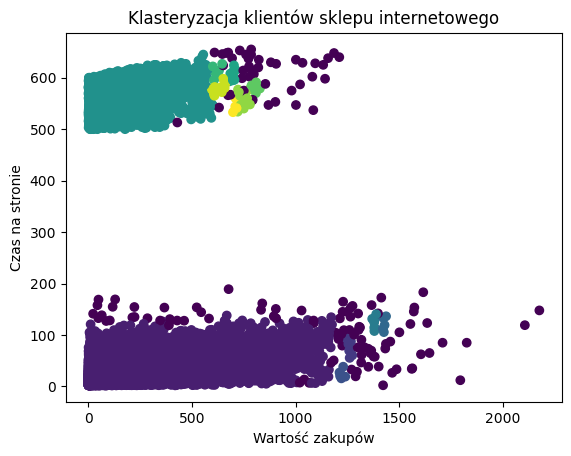

In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN

#wczytujemy dane klientów z pliku CSV
data = pd.read_csv('purchase_data_exe.csv')

#klasteryzacja DBSCAN
dbscan = DBSCAN(eps=20, min_samples=5)
data['Cluster'] = dbscan.fit_predict(data[['value [USD]', 'time_on_site [Minutes]']])

#wizualizacja klasteryzacji
import matplotlib.pyplot as plt
#definicje danych dla wykresu
x_data = data['value [USD]']
y_data = data['time_on_site [Minutes]']
cluster_labels = data['Cluster']

#tworzenie wykresu
plt.scatter(x_data, y_data, c=cluster_labels, cmap='viridis')
plt.xlabel('Wartość zakupów')
plt.ylabel('Czas na stronie')
plt.title('Klasteryzacja klientów sklepu internetowego')

plt.show()

In [2]:
#DYSKRETYZACJA
#tworzenie przedziałów dla wartości płatności
payment_bins = [0, 50, 200, 1000, float('inf')]  # float('inf') oznacza nieskończoność

#przypisanie wartości płatności do przedziałów
payment_labels = ['niska', 'średnia', 'wysoka', 'bardzo wysoka']
data['PaymentCategory'] = pd.cut(data['value [USD]'], bins=payment_bins, labels=payment_labels)

#wybieranie tylko kolumn "customer_id" i "PaymentCategory"
result = data[['customer_id', 'PaymentCategory']]
print(result)

       customer_id PaymentCategory
0            37077           niska
1            59173         średnia
2            41066         średnia
3            50741           niska
4            53639          wysoka
...            ...             ...
24994        33699         średnia
24995        38652         średnia
24996        30222          wysoka
24997        30183          wysoka
24998        46662           niska

[24999 rows x 2 columns]
